In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout


In [2]:
data = pd.read_csv('project_1_train_imputed_ordered.csv')

In [3]:
X = data.drop(columns=['DirectChol'])
y = data['DirectChol']

In [4]:
categorical_columns = X.select_dtypes(exclude=[np.number]).columns.tolist()

In [5]:
label_encoder = LabelEncoder()
for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Lineer Regressions Model
lr = LinearRegression()

#Random Forest
rf = RandomForestRegressor(random_state=0)

#SVR
svr = SVR()



In [12]:
param_grid_lr = {'fit_intercept': [True, False], 'positive': [True, False]}

param_grid_rf = {'n_estimators': [100, 150],'max_depth': [10, 15], 'min_samples_split': [2, 3]}

param_grid_svr = {'kernel': ['rbf'], 'C': [1, 10], 'epsilon': [0.1, 0.2], 'gamma': ['scale']}


In [13]:
grid_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='neg_mean_squared_error')
grid_lr.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'positive': [True, False]},
             scoring='neg_mean_squared_error')

In [14]:
grid_svr = GridSearchCV(svr, param_grid_svr, cv=5, scoring='neg_mean_squared_error')
grid_svr.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 10], 'epsilon': [0.1, 0.2],
                         'gamma': ['scale'], 'kernel': ['rbf']},
             scoring='neg_mean_squared_error')

In [29]:
grid_rf = GridSearchCV(estimator=rf ,param_grid=param_grid_rf,cv=5,scoring='neg_mean_squared_error',verbose=1)
grid_rf.fit(X_train, y_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [10, 15], 'min_samples_split': [2, 3],
                         'n_estimators': [100, 150]},
             scoring='neg_mean_squared_error', verbose=1)

In [30]:
print(f"Linear Regression Best Parameters: {grid_lr.best_params_}")
print(f"Random Forest Best parameters: {grid_rf.best_params_}")
print(f"SVR Best parameters: {grid_svr.best_params_}")

Linear Regression Best Parameters: {'fit_intercept': True, 'positive': False}
Random Forest Best parameters: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 150}
SVR Best parameters: {'C': 10, 'epsilon': 0.2, 'gamma': 'scale', 'kernel': 'rbf'}


In [31]:
best_lr = grid_lr.best_estimator_
best_rf = grid_rf.best_estimator_
best_svr = grid_svr.best_estimator_


In [32]:
cv_score_lr = cross_val_score(best_lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_score_svr = cross_val_score(best_svr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_sroce_rf = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

In [34]:
print(f"Linear Regression CV Mean MSE: {abs(cv_score_lr.mean())}")
print(f"SVR Mean MSE: {abs(cv_score_svr.mean())}")
print(f"Random Forest CV Mean MSE: {abs(cv_sroce_rf.mean())}")

Linear Regression CV Mean MSE: 0.1035049015479678
SVR Mean MSE: 0.13331429702559036
Random Forest CV Mean MSE: 0.07231891230849596


In [35]:
y_pred_lr = best_lr.predict(X_test)
y_pred_svr = best_svr.predict(X_test)
y_pred_rf = best_rf.predict(X_test)

In [44]:
dnn_model = Sequential()
dnn_model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
dnn_model.add(Dropout(0.3))  
dnn_model.add(Dense(units=128, activation='relu'))
dnn_model.add(Dropout(0.3))
dnn_model.add(Dense(units=64, activation='relu'))
dnn_model.add(Dense(units=1, activation='linear'))
dnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

c:\Users\brhnd\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

In [52]:
dnn_model.fit(X_train, y_train, 
              epochs=200, 
              batch_size=32, 
              validation_data=(X_test, y_test), 
              callbacks=[early_stopping])


Epoch 1/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1969 - val_loss: 0.1386
Epoch 2/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 0.1402 - val_loss: 0.1386
Epoch 3/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 0.1382 - val_loss: 0.1386
Epoch 4/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - loss: 0.1357 - val_loss: 0.1386
Epoch 5/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - loss: 0.1376 - val_loss: 0.1386
Epoch 6/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - loss: 0.1397 - val_loss: 0.1386
Epoch 7/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - loss: 0.1401 - val_loss: 0.1386
Epoch 8/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - loss: 0.1446 - val_loss: 0.1394
Epoch 9/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 0.1375 - val_loss: 0.1386
Epoch 10/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - loss: 0.1412 - val_loss: 0.1386
Epoch 11/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - loss: 0.1414 - val_loss: 0.1386
Epoch 12/200
200/200 

In [53]:
y_pred_dnn = dnn_model.predict(X_test)
mse_dnn = mean_squared_error(y_test, y_pred_dnn)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step


In [54]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_dnn = mean_squared_error(y_test, y_pred_dnn)


In [55]:
print(f"Linear Regression Test MSE: {mse_lr}")
print(f"SVR MSE: {mse_svr}")
print(f"Random Forest Test MSE: {mse_rf}")
print(f"DNN Test MSE: {mse_dnn}")

Linear Regression Test MSE: 0.10265014388301022
SVR MSE: 0.13276238307459604
Random Forest Test MSE: 0.06195755515059462
DNN Test MSE: 0.13860170759923643


In [50]:
data = {
    'Linear Regression' : mse_lr,
    'SVR' : mse_svr,
    'Random Forest': mse_rf,
    'DNN': mse_dnn
}

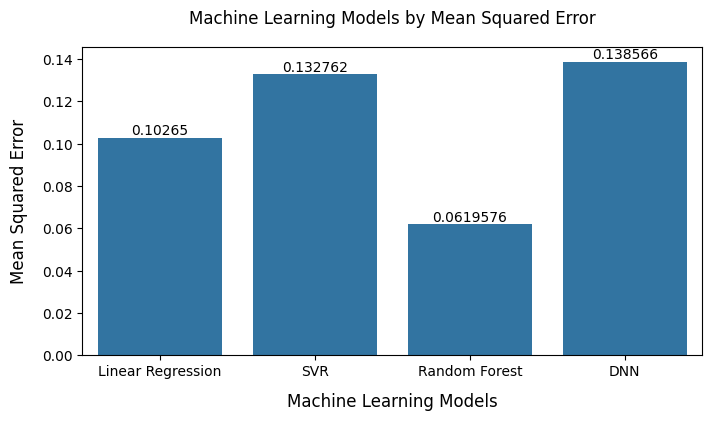

In [51]:
names = list(data.keys())
values = list(data.values())
plt.figure(figsize = (8,4))
ax = sns.barplot(x = names,y = values)
ax.bar_label(ax.containers[0])
plt.xlabel("Machine Learning Models",size = 12,labelpad = 10)
plt.ylabel("Mean Squared Error",size = 12,labelpad=10)
plt.title("Machine Learning Models by Mean Squared Error",size = 12,y = 1.05)
plt.show()